#### SPDdata: 

 structure containing hydrophone spectral data in the following fields:
- SPD: the spectral probability density histogram
    - frequencyBinCentres: vector of frequency bin centres in Hz.
    - psdBinCentres: vector of power spectral density bin centres in dB.
    - percentLevels: values at which the percentiles are generated (%).
    - percentiles: matrix of the SPD percentiles corresponding to the percentLevels.
    - linearMeanSPL: vector of the linear mean sound pressure level (dB).

##### Import modules

In [1]:
import glob
import copy
import itertools
import pandas as pd
import scipy.io as io
import os
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# current directory
dirO = os.chdir('C:/Users/aBr/Desktop/work term/ONC/Codes/ICLISTENHF1560 - Strait of Georgia East Node')

# look for .mat format
files_grabbed = glob.glob('*.mat')

%matplotlib inline

We have considered the hydrophone deployed at Strait of Georgia East Node(ICLISTENHF1560) to study the soundscape plots. 


**Type 1:**


First case, considering the following different frequencies range i.e.

    a) 10 ~ 100 Hz
    b) 100 ~ 1000 Hz
    c) 1000 ~ 10,000 Hz
    d) 10,000 ~ above Hz
    
Then we found out the mean of the frequencies range individually, for each case, we tried to find out the data which crosses the thresholds ( averages for each frequencies) and finally, we plotted them against 1st, 50th and 99th percentile. 

In [2]:
cwd = os.getcwd()
curr = os.path.splitext(os.path.basename(cwd))[0]

In [3]:
# make time data into Timestamp format
def try_totime(t):
    try:
        return pd.Timestamp(t)
    except:
        return np.nan

In [4]:
# frequencies
this = [10,100]
thisF = np.mean(this)

In [5]:
all_files_data = [] 

for file in files_grabbed:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df = copy.deepcopy(frequencies)
    df[['date_from','date_to']] = start_date_and_end_date 
    df['start'] = df.date_from.map(try_totime)
    df['end'] = df.date_to.map(try_totime)
    df['time'] = df.start + (df.end - df.start)/2

    df = df.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df.loc[df.frequencyBinCentres>=thisF,:].iloc[0])
    df_all_files = pd.concat(all_files_data, axis=0,ignore_index=False)
#df_all_files['date_from'] = pd.to_datetime(df_all_files['date_from'],utc=True)
#df_all_files['date_to'] = pd.to_datetime(df_all_files['date_to'],utc=True)    
df_all_files['time']=  pd.to_datetime(df_all_files['time'],utc=True)
df_all_files =df_all_files.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

In [6]:
# frequencies
this1 = [100, 1000]
thisF1 = np.mean(this1)

In [7]:
all_files_data1 = [] 

for file1 in files_grabbed:

    contents_squeezed1 = io.loadmat(file1, squeeze_me=True)
    
    start_date_and_end_date1  = file1.split('-')[0].split('_')[-2:]  
    df_temp1 = []   
    for item in contents_squeezed1['SPDdata'].dtype.names:

        df_temp1.append(pd.DataFrame({str(item) : [contents_squeezed1['SPDdata'][item].item()]})) 

    data_frame1 = pd.concat(df_temp1, axis=1)

    percentiles1 = pd.DataFrame(list(itertools.chain(*data_frame1.percentiles)),columns=list(itertools.chain(*data_frame1.percentLevels)))
  
    frequencies1 = pd.DataFrame(list(itertools.chain(*data_frame1.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df1 = copy.deepcopy(frequencies1)
    df1[['date_from','date_to']] = start_date_and_end_date1 
    df1['start'] = df1.date_from.map(try_totime)
    df1['end'] = df1.date_to.map(try_totime)
    df1['time'] = df1.start + (df1.end - df1.start)/2

    df1 = df1.merge(percentiles1, left_index=True,right_index=True)

    all_files_data1.append(df1.loc[df1.frequencyBinCentres>=thisF1,:].iloc[0])
    df_all_files1 = pd.concat(all_files_data1, axis=0,ignore_index=False)
#df_all_files['date_from'] = pd.to_datetime(df_all_files['date_from'],utc=True)
#df_all_files['date_to'] = pd.to_datetime(df_all_files['date_to'],utc=True)    
df_all_files1['time']=  pd.to_datetime(df_all_files1['time'],utc=True)
df_all_files1 =df_all_files1.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

In [8]:
# frequencies
this2 = [1000, 10000]
thisF2 = np.mean(this2)

In [9]:
all_files_data2 = [] 

for file2 in files_grabbed:

    contents_squeezed2 = io.loadmat(file2, squeeze_me=True)
    
    start_date_and_end_date2  = file2.split('-')[0].split('_')[-2:]  
    df_temp2 = []   
    for item in contents_squeezed2['SPDdata'].dtype.names:

        df_temp2.append(pd.DataFrame({str(item) : [contents_squeezed2['SPDdata'][item].item()]})) 

    data_frame2 = pd.concat(df_temp2, axis=1)

    percentiles2 = pd.DataFrame(list(itertools.chain(*data_frame2.percentiles)),columns=list(itertools.chain(*data_frame2.percentLevels)))
  
    frequencies2 = pd.DataFrame(list(itertools.chain(*data_frame2.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df2 = copy.deepcopy(frequencies2)
    df2[['date_from','date_to']] = start_date_and_end_date2 
    df2['start'] = df2.date_from.map(try_totime)
    df2['end'] = df2.date_to.map(try_totime)
    df2['time'] = df2.start + (df2.end - df2.start)/2

    df2 = df2.merge(percentiles2, left_index=True,right_index=True)

    all_files_data2.append(df2.loc[df2.frequencyBinCentres>=thisF2,:].iloc[0])
    df_all_files2 = pd.concat(all_files_data2, axis=0,ignore_index=False)
#df_all_files['date_from'] = pd.to_datetime(df_all_files['date_from'],utc=True)
#df_all_files['date_to'] = pd.to_datetime(df_all_files['date_to'],utc=True)    
df_all_files2['time']=  pd.to_datetime(df_all_files2['time'],utc=True)
df_all_files2 =df_all_files2.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

In [10]:
# frequencies
this3 = [10000, 15500]
thisF3 = np.mean(this3)

In [11]:
all_files_data3 = [] 

for file3 in files_grabbed:

    contents_squeezed3 = io.loadmat(file3, squeeze_me=True)
    
    start_date_and_end_date3  = file3.split('-')[0].split('_')[-2:]  
    df_temp3 = []   
    for item in contents_squeezed3['SPDdata'].dtype.names:

        df_temp3.append(pd.DataFrame({str(item) : [contents_squeezed3['SPDdata'][item].item()]})) 

    data_frame3 = pd.concat(df_temp3, axis=1)

    percentiles3 = pd.DataFrame(list(itertools.chain(*data_frame3.percentiles)),columns=list(itertools.chain(*data_frame3.percentLevels)))
  
    frequencies3 = pd.DataFrame(list(itertools.chain(*data_frame3.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df3 = copy.deepcopy(frequencies3)
    df3[['date_from','date_to']] = start_date_and_end_date3 
    df3['start'] = df3.date_from.map(try_totime)
    df3['end'] = df3.date_to.map(try_totime)
    df3['time'] = df3.start + (df3.end - df3.start)/2

    df3 = df3.merge(percentiles3, left_index=True,right_index=True)

    all_files_data3.append(df3.loc[df3.frequencyBinCentres>=thisF3,:].iloc[0])
    df_all_files3 = pd.concat(all_files_data3, axis=0,ignore_index=False)
#df_all_files['date_from'] = pd.to_datetime(df_all_files['date_from'],utc=True)
#df_all_files['date_to'] = pd.to_datetime(df_all_files['date_to'],utc=True)    
df_all_files3['time']=  pd.to_datetime(df_all_files3['time'],utc=True)
df_all_files3 =df_all_files3.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

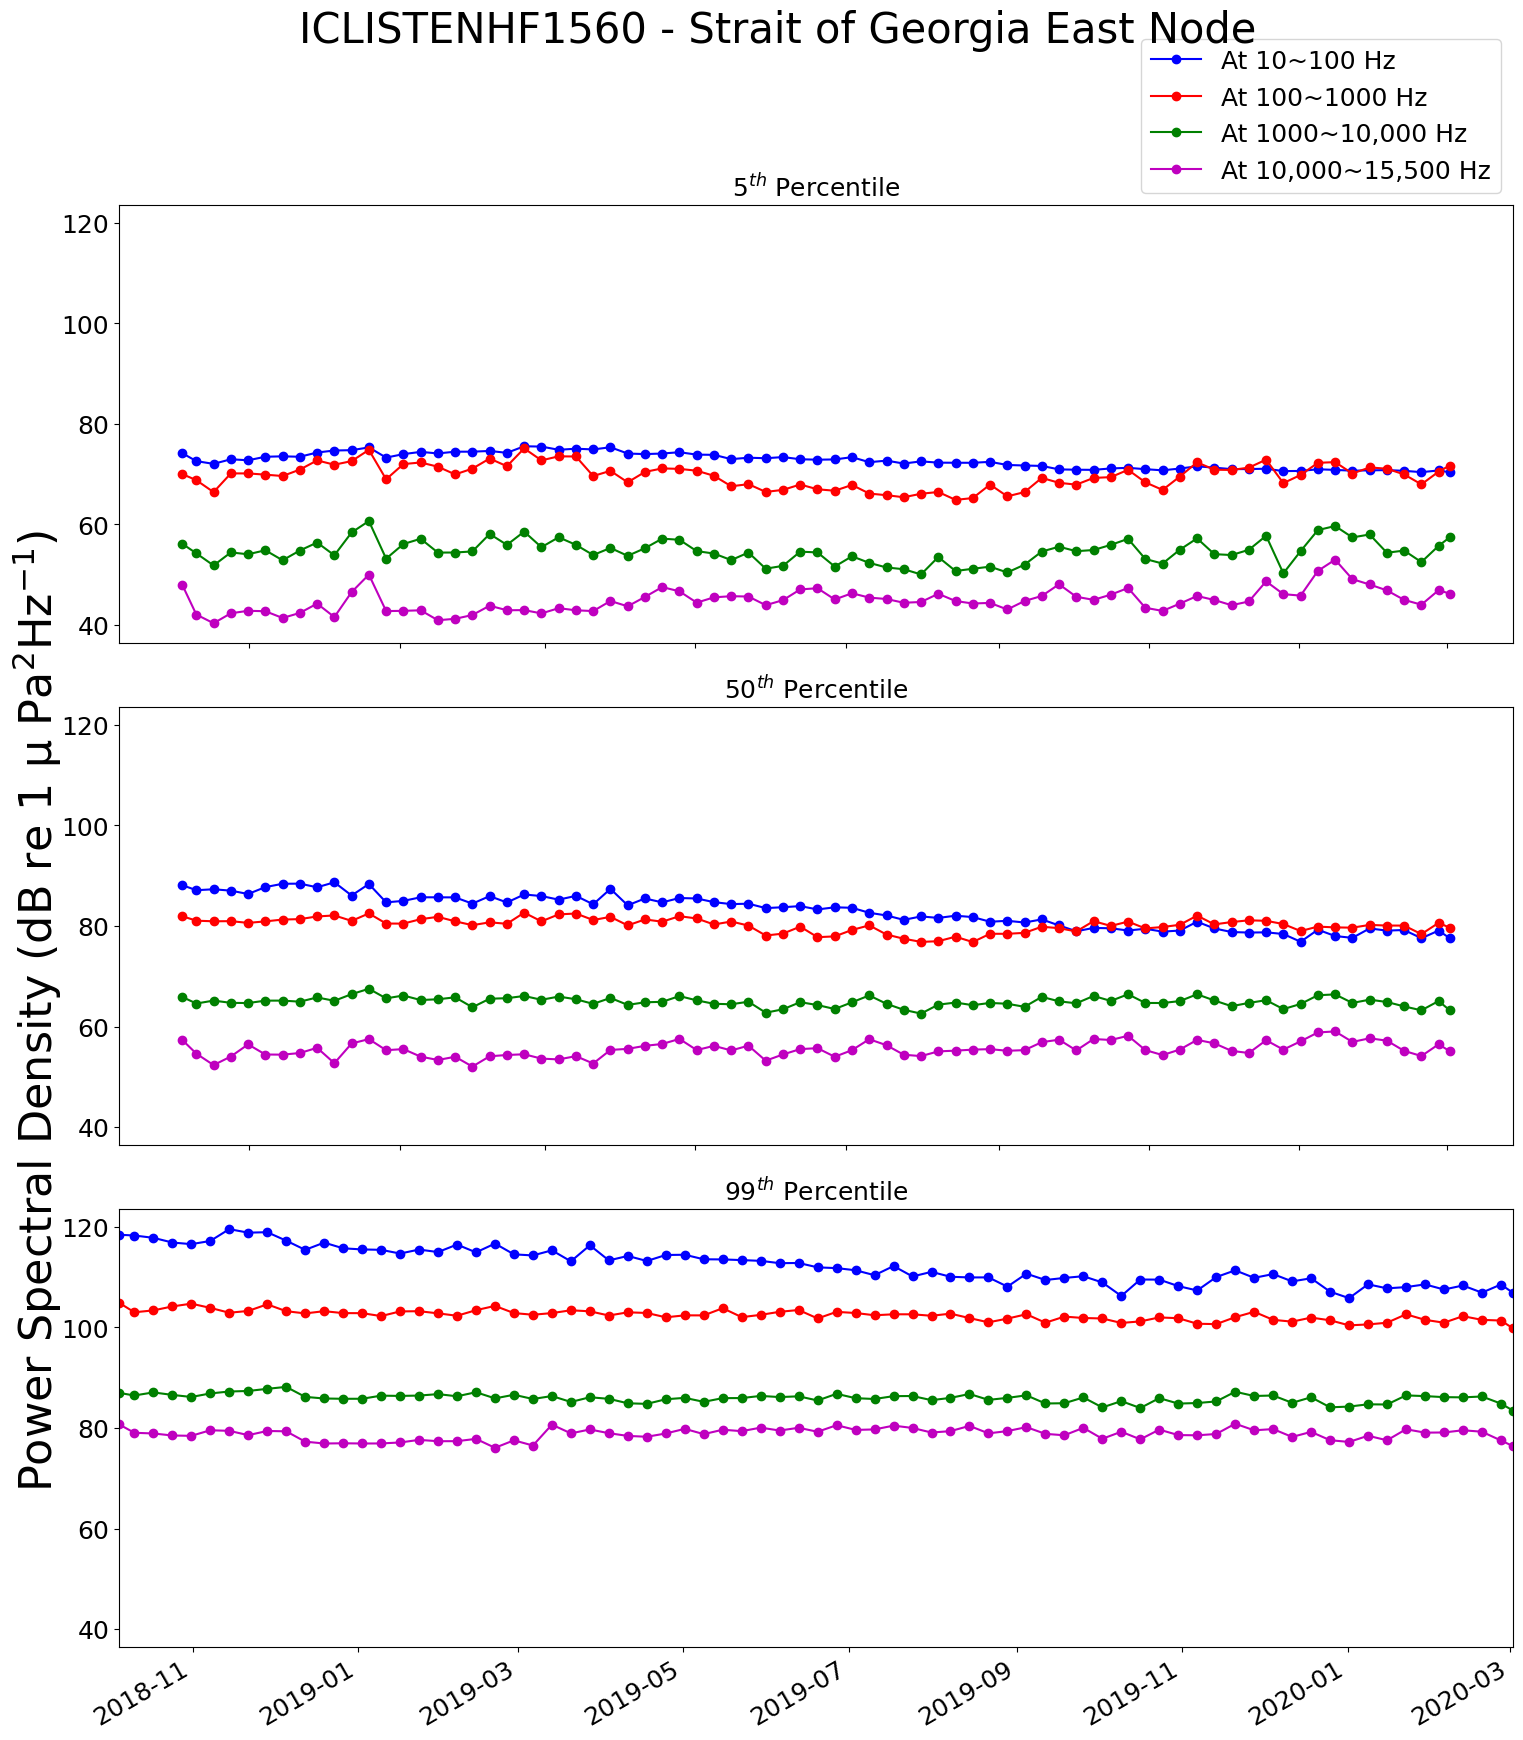

In [12]:
fig,(ax1,ax2,ax3) =plt.subplots(3,figsize=(16,21), dpi= 100, facecolor='w', edgecolor='k', sharey = True,sharex = False)

fig.suptitle(curr, fontsize=30)

ax1.set_title("$5^{th}$ Percentile")
l1=ax1.plot(df_all_files["time"], df_all_files["p05"],'b-o', label='At 10~100 Hz')
l2=ax1.plot(df_all_files1["time"], df_all_files1["p05"],'r-o', label='At 100~1000 Hz')
l3=ax1.plot(df_all_files2["time"], df_all_files2["p05"],'g-o', label='At 1000~10,000 Hz')
l4=ax1.plot(df_all_files3["time"], df_all_files3["p05"],'m-o', label='At 10,000~15,500 Hz')

ax2.set_title("$50^{th}$ Percentile")
l5=ax2.plot(df_all_files["time"], df_all_files["p50"],'b-o')
l6=ax2.plot(df_all_files1["time"], df_all_files1["p50"],'r-o')
l7=ax2.plot(df_all_files2["time"], df_all_files2["p50"],'g-o')
l8=ax2.plot(df_all_files3["time"], df_all_files3["p50"],'m-o')

ax3.set_title("$99^{th}$ Percentile")
l9=ax3.plot(df_all_files["time"], df_all_files["p99"],'b-o')
l10=ax3.plot(df_all_files1["time"], df_all_files1["p99"],'r-o')
l11=ax3.plot(df_all_files2["time"], df_all_files2["p99"],'g-o')
l12=ax3.plot(df_all_files3["time"], df_all_files3["p99"],'m-o')



ax1.legend(loc='lower right',bbox_to_anchor=(1.0, 1.0))

fig.supylabel(' Power Spectral Density (dB re $1$ \u03BC Pa$^2$Hz$^{-1}$)')
plt.margins(x=0)

fig.tight_layout() 
plt.gcf().autofmt_xdate()

#plt.savefig('soundscape.png', bbox_inches='tight')

**Type 2:**


First case, considering the range of frequencies at 10 ~ 500 Hz and we will try to look for data at three different frequencies such as

    a) 50 Hz
    b) 100 Hz
    c) 200 Hz


For each case, we tried to find out the data which crosses the thresholds (for each frequencies) and finally, we plotted them at 1st, 50th and 99th percentile. 

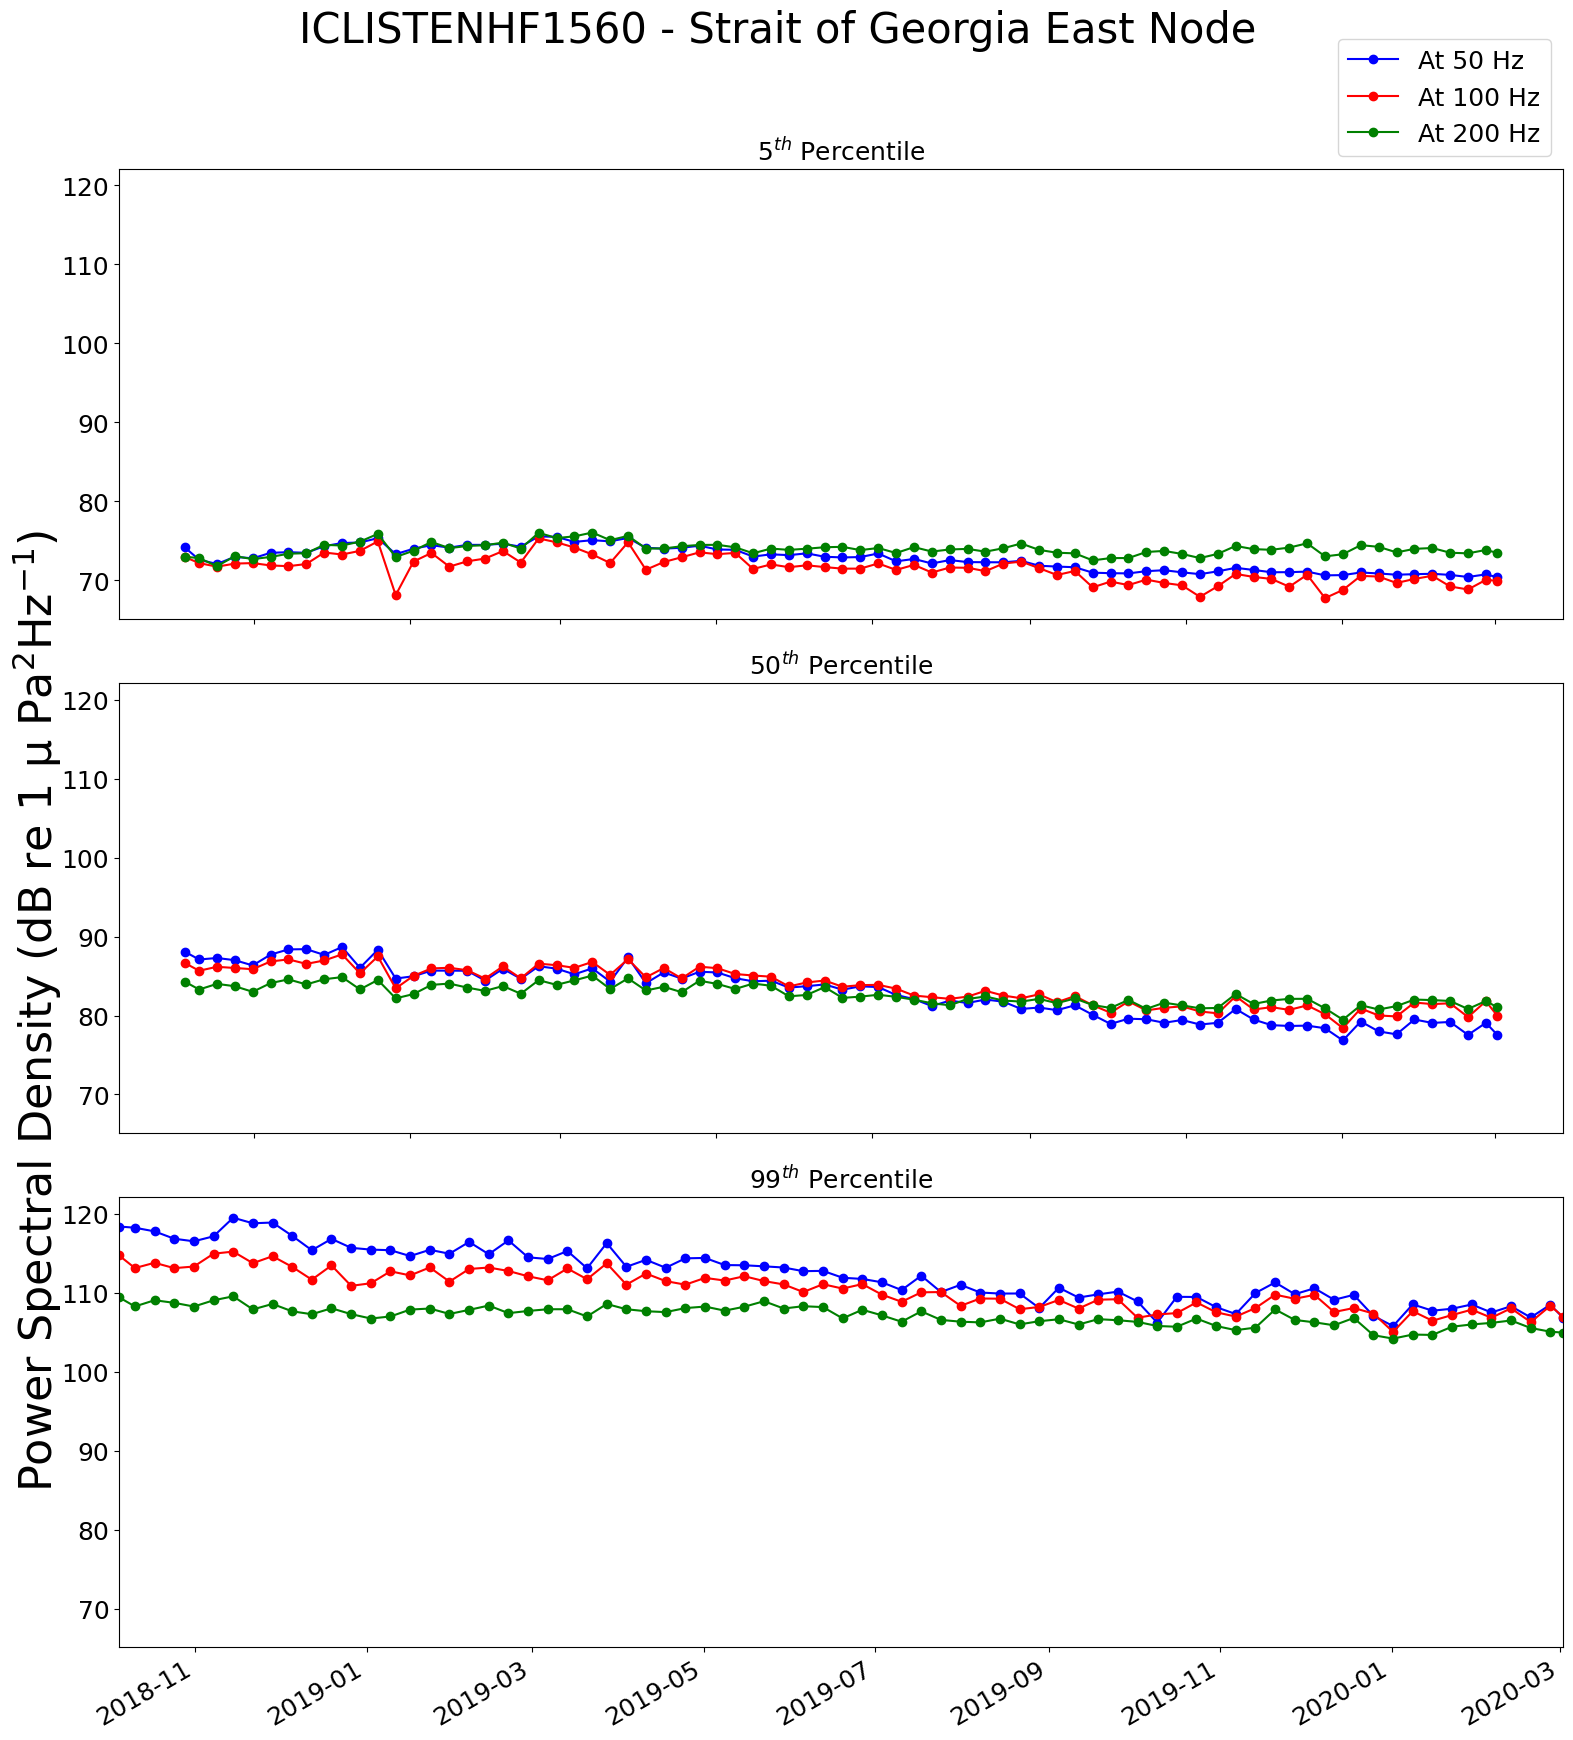

In [13]:
# frequencies
thisABC = [10,500]
A = 50   
B = 100
C = 200

all_files_data = [] 
all_files_data2 = [] 
all_files_data3 = [] 

for file in files_grabbed:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df = copy.deepcopy(frequencies)
    df[['date_from','date_to']] = start_date_and_end_date 
    df['start'] = df.date_from.map(try_totime)
    df['end'] = df.date_to.map(try_totime)
    df['time'] = df.start + (df.end - df.start)/2

    df = df.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df.loc[df.frequencyBinCentres>=A,:].iloc[0])
    all_files_data2.append(df.loc[df.frequencyBinCentres>=B,:].iloc[0])
    all_files_data3.append(df.loc[df.frequencyBinCentres>=C,:].iloc[0])

    df_all_files = pd.concat(all_files_data, axis=0,ignore_index=False)
    df_all_files2 = pd.concat(all_files_data2, axis=0,ignore_index=False)
    df_all_files3 = pd.concat(all_files_data3, axis=0,ignore_index=False)

df_all_files['time']=  pd.to_datetime(df_all_files['time'],utc=True)
df_all_files =df_all_files.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

df_all_files2['time']=  pd.to_datetime(df_all_files2['time'],utc=True)
df_all_files2 =df_all_files2.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

df_all_files3['time']=  pd.to_datetime(df_all_files3['time'],utc=True)
df_all_files3 =df_all_files3.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

fig,(ax1,ax2,ax3) =plt.subplots(3,figsize=(16,21), dpi= 100, facecolor='w', edgecolor='k', sharey = True,sharex = False)

fig.suptitle(curr, fontsize=30)

ax1.set_title("$5^{th}$ Percentile")
l1=ax1.plot(df_all_files["time"], df_all_files["p05"],'b-o', label='At 50 Hz')
l2=ax1.plot(df_all_files2["time"], df_all_files2["p05"],'r-o', label='At 100 Hz')
l3=ax1.plot(df_all_files3["time"], df_all_files3["p05"],'g-o', label='At 200 Hz')

ax2.set_title("$50^{th}$ Percentile")
l4=ax2.plot(df_all_files["time"], df_all_files["p50"],'b-o')
l5=ax2.plot(df_all_files2["time"], df_all_files2["p50"],'r-o')
l6=ax2.plot(df_all_files3["time"], df_all_files3["p50"],'g-o')

ax3.set_title("$99^{th}$ Percentile")
l7=ax3.plot(df_all_files["time"], df_all_files["p99"],'b-o')
l8=ax3.plot(df_all_files2["time"], df_all_files2["p99"],'r-o')
l9=ax3.plot(df_all_files3["time"], df_all_files3["p99"],'g-o')



ax1.legend(loc='lower right',bbox_to_anchor=(1.0, 1.0))

fig.supylabel(' Power Spectral Density (dB re $1$ \u03BC Pa$^2$Hz$^{-1}$)')
fig.tight_layout() 

plt.margins(x=0)
plt.gcf().autofmt_xdate()


**Type 3:**


First case, considering the range of frequencies at 10 ~ 500 Hz and we will try to look for data at three different frequencies such as
    
    a) 50 Hz
    b) 100 Hz
    c) 200 Hz

For each case, we tried to find out the data which crosses the thresholds (for each frequencies) and finally, we plot 1st, 50th and 99th percentile data at the chosen frequencies.

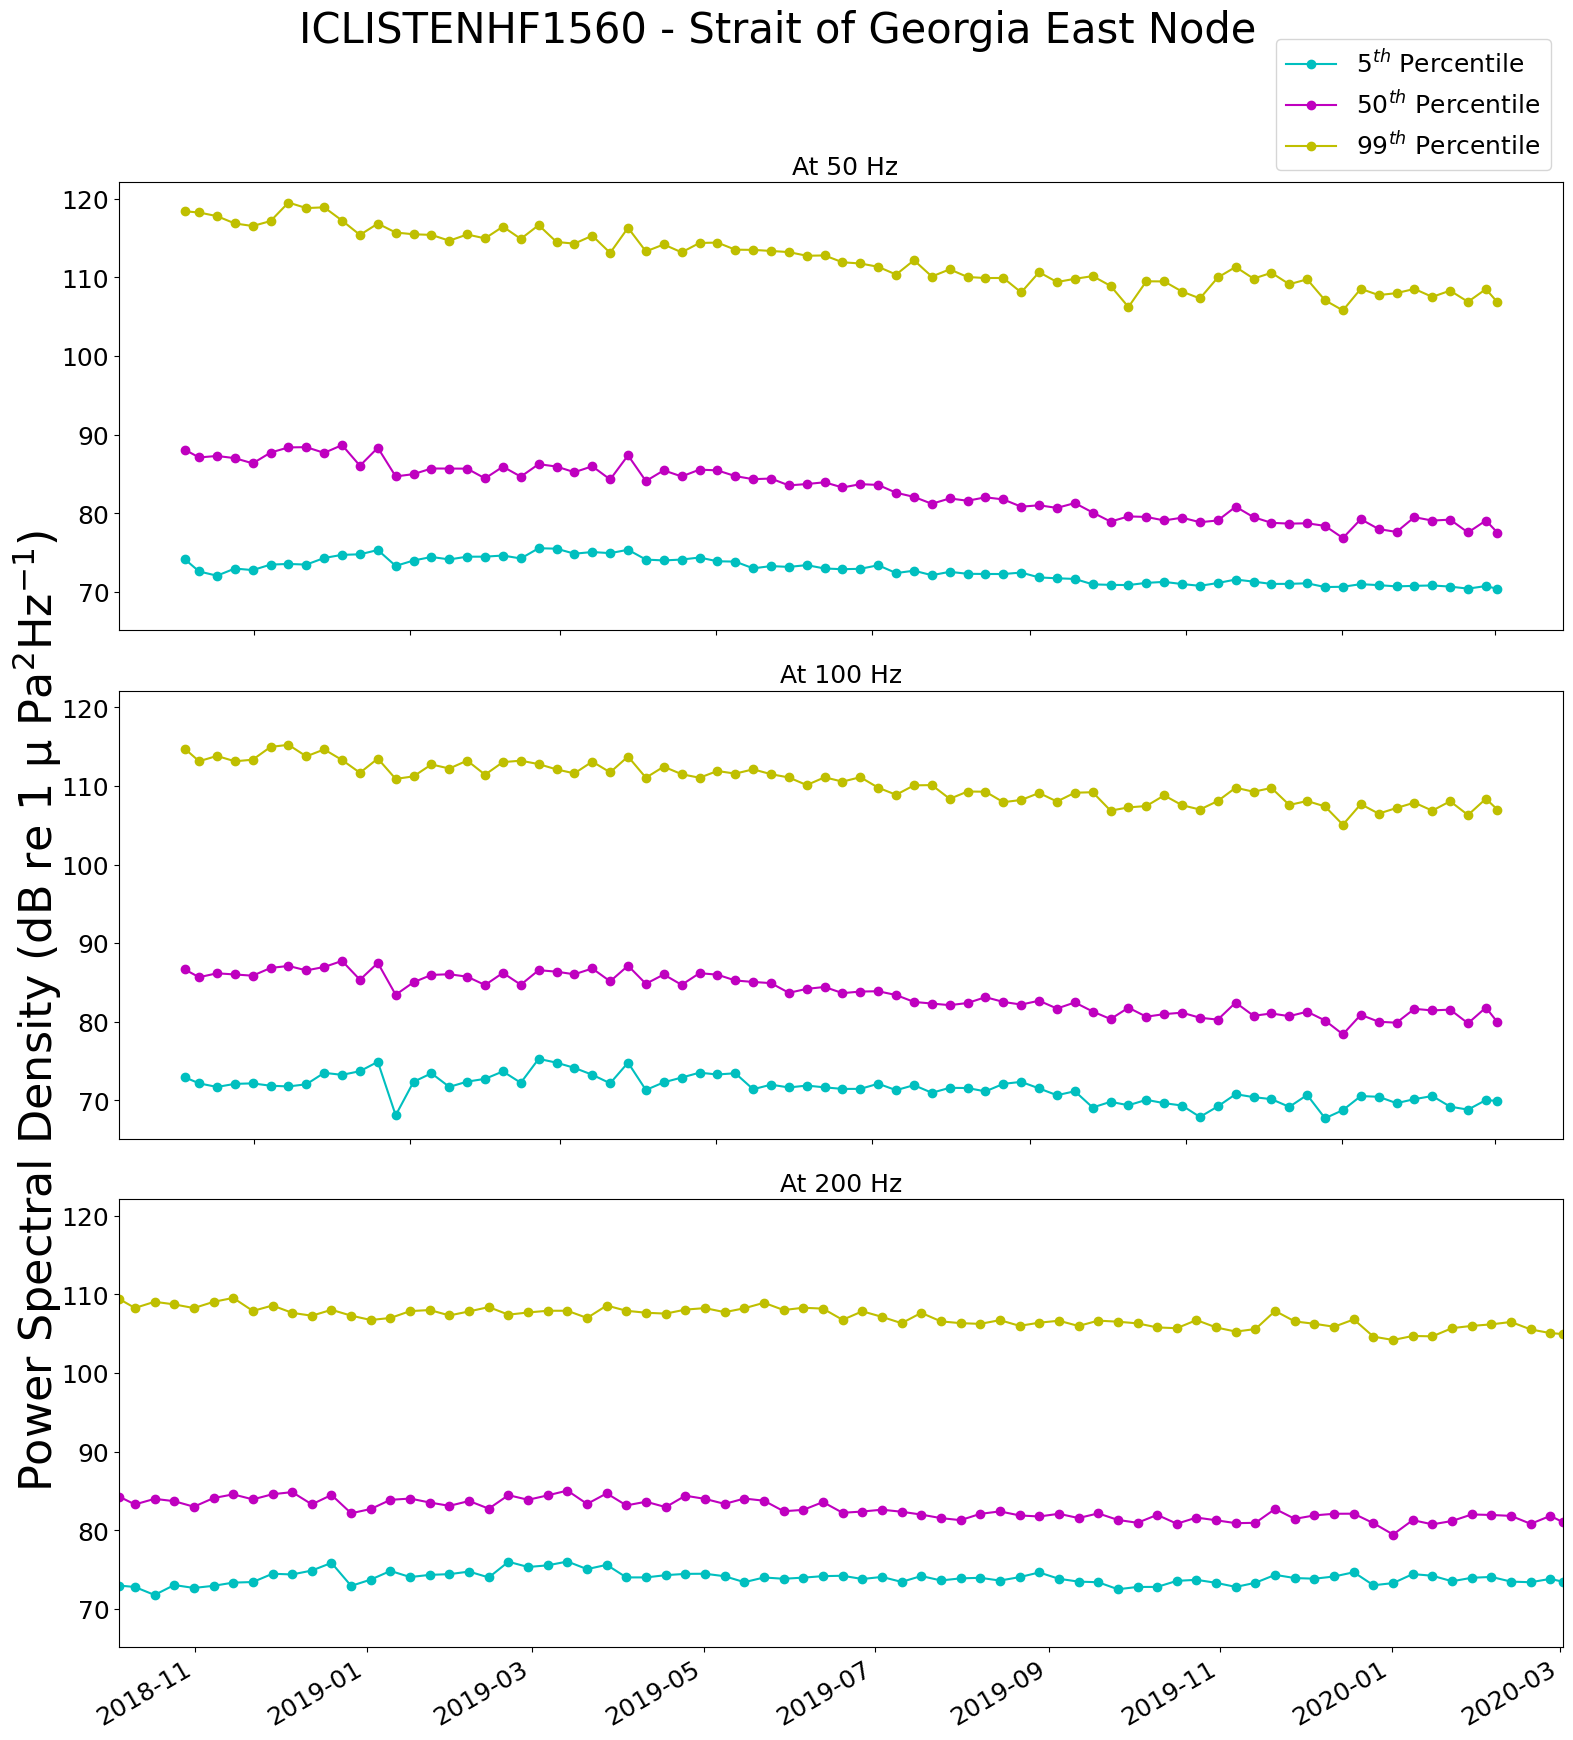

In [14]:
# frequencies
thisABC = [10,500]
A = 50   
B = 100
C = 200

all_files_data = [] 
all_files_data2 = [] 
all_files_data3 = [] 

for file in files_grabbed:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df = copy.deepcopy(frequencies)
    df[['date_from','date_to']] = start_date_and_end_date 
    df['start'] = df.date_from.map(try_totime)
    df['end'] = df.date_to.map(try_totime)
    df['time'] = df.start + (df.end - df.start)/2

    df = df.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df.loc[df.frequencyBinCentres>=A,:].iloc[0])
    all_files_data2.append(df.loc[df.frequencyBinCentres>=B,:].iloc[0])
    all_files_data3.append(df.loc[df.frequencyBinCentres>=C,:].iloc[0])

    df_all_files = pd.concat(all_files_data, axis=0,ignore_index=False)
    df_all_files2 = pd.concat(all_files_data2, axis=0,ignore_index=False)
    df_all_files3 = pd.concat(all_files_data3, axis=0,ignore_index=False)

df_all_files['time']=  pd.to_datetime(df_all_files['time'],utc=True)
df_all_files =df_all_files.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

df_all_files2['time']=  pd.to_datetime(df_all_files2['time'],utc=True)
df_all_files2 =df_all_files2.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)

df_all_files3['time']=  pd.to_datetime(df_all_files3['time'],utc=True)
df_all_files3 =df_all_files3.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)



fig,(ax1,ax2,ax3) =plt.subplots(3,figsize=(16,21), dpi= 100, facecolor='w', edgecolor='k', sharey = True,sharex = False)

fig.suptitle(curr, fontsize=30)

ax1.set_title(" At 50 Hz")
l1=ax1.plot(df_all_files["time"], df_all_files["p05"],'c-o', label='$5^{th}$ Percentile')
l2=ax1.plot(df_all_files["time"], df_all_files["p50"],'m-o', label = '$50^{th}$ Percentile')
l3=ax1.plot(df_all_files["time"], df_all_files["p99"],'y-o', label='$99^{th}$ Percentile')

ax2.set_title("At 100 Hz")
l4=ax2.plot(df_all_files2["time"], df_all_files2["p05"],'c-o')
l5=ax2.plot(df_all_files2["time"], df_all_files2["p50"],'m-o')
l6=ax2.plot(df_all_files2["time"], df_all_files2["p99"],'y-o')

ax3.set_title("At 200 Hz")
l7=ax3.plot(df_all_files3["time"], df_all_files3["p05"],'c-o')
l8=ax3.plot(df_all_files3["time"], df_all_files3["p50"],'m-o')
l9=ax3.plot(df_all_files3["time"], df_all_files3["p99"],'y-o')



ax1.legend(loc='lower right',bbox_to_anchor=(1.0, 1.0))

fig.supylabel(' Power Spectral Density (dB re $1$ \u03BC Pa$^2$Hz$^{-1}$)')
fig.tight_layout() 

plt.margins(x=0)
plt.gcf().autofmt_xdate()
